In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

# D:\Projects\DataAnalystProjects\F1 2024 Preseason Testing\F1Testing24' file path
file_path = r'D:\Projects\DataAnalystProjects\F1 2024 Preseason Testing\F1Testing24.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Display the data in a table
data


,Position,Driver,Team,Time,Gap,Laps,Tyres,Day,Best Lap Time,Gap to Best Lap Time,Best Lap Times
0,1,Max Verstappen,Red Bull,1:31.344s,0.000s,142,C3,1,01:31.3,0.000,131.344
1,2,Lando Norris,Mclaren,1:32.484s,+1.140s,72,C3,1,01:32.5,1.140,132.484
2,3,Carlos Sainz,Ferrari,1:32.584s,+1.240s,69,C3,1,01:32.6,1.240,132.584
3,4,Daniel Ricciardo,RB,1:32.599s,+1.255s,51,C3,1,01:32.6,1.255,132.599
4,5,Pierre Gasly,Alpine,1:32.805s,+1.461s,60,C3,1,01:32.8,1.461,132.805
5,6,Lance Stroll,Aston Martin,1:33.007s,+1.663s,53,C3,1,01:33.0,1.663,133.007
6,7,Charles Leclerc,Ferrari,1:33.247s,+1.903s,64,C3,1,01:33.2,1.903,133.247
7,8,Fernando Alonso,Aston Martin,1:33.385s,+2.041s,77,C3,1,01:33.4,2.041,133.385
8,9,Oscar Piastri,Mclaren,1:33.658s,+2.314s,57,C3,1,01:33.7,2.314,133.658
9,10,Zhou Guanyu,Sauber,1:33.871s,+2.527s,62,C3,1,01:33.9,2.527,133.871


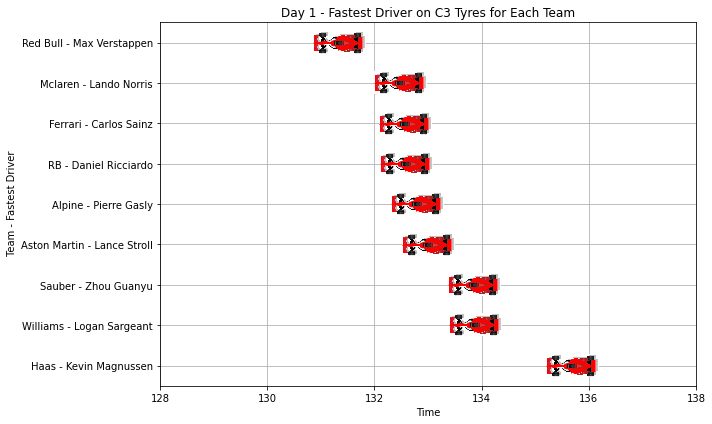

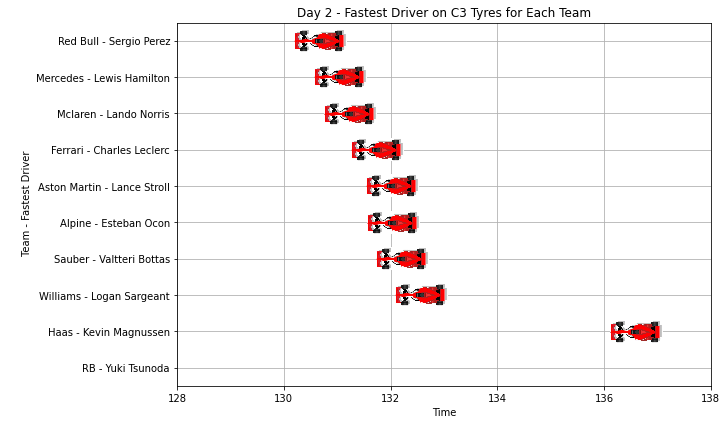

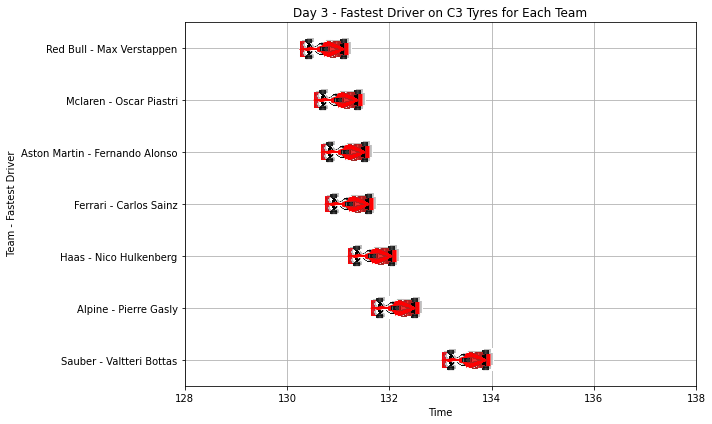

In [47]:
# Filter data for C3 Tyres and smallest Best Lap Time for each team on each day
filtered_data = data[data['Tyres'] == 'C3'].groupby(['Day', 'Team']).apply(lambda x: x.loc[x['Best Lap Times'].idxmin()])

# Sort the data by lap time
filtered_data.sort_values(by='Best Lap Times', inplace=True)

# Define the path to the image
image_path = r'D:\Projects\DataAnalystProjects\F1 2024 Preseason Testing\F1Car.jpg'

# Create separate charts for each day
for day in range(1, 4):
    plt.figure(figsize=(10, 6))
    day_data = filtered_data.loc[day]
    team_driver = day_data['Team'] + ' - ' + day_data['Driver']
    
    # Scatter plot with circles
    plt.scatter(day_data['Best Lap Times'], team_driver, s=0, alpha=0, color='black', edgecolor='black', zorder=2)
    
    # Overlay images on top of scatter points
    for x, y, team_driver in zip(day_data['Best Lap Times'], team_driver, team_driver):
        img = OffsetImage(plt.imread(image_path), zoom=0.1)
        ab = AnnotationBbox(img, (x, y), frameon=False)
        plt.gca().add_artist(ab)
    
    plt.title(f'Day {day} - Fastest Driver on C3 Tyres for Each Team')
    plt.xlabel('Time')
    plt.ylabel(' Team - Fastest Driver')
    plt.xlim(128, 138)  # Set the range for the x-axis
    plt.ylim(-0.5, len(day_data) - 0.5)  # Adjust y-axis limits
    plt.gca().invert_yaxis()  # Invert y-axis to have the smallest number at the top
    plt.grid(True)
    plt.tight_layout()
    plt.show()